In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
#Funcion hash para mapear de una coordenada (x, y) a un numero natural (de forma univoca)
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAncho):
    return valorCoordenadaX * numeroVerticesAncho + valorCoordenadaY

#Funcion hash para mapear de un numero natural a una coordenada (x, y) (de forma univoca)
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    for indice1 in range(numeroVerticesAncho):
        for indice2 in range(numeroVerticesAlto):
            listaValoresCoordenadaX.append(indice1)
            listaValoresCoordenadaY.append(indice2)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def dibujarAristasPlanoCartesiano(grafo, listaNivelesTrafico, listaColoresNivelesTrafico, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo):
    transparencia = 0.9
    numeroNivelesTrafico = len(listaNivelesTrafico)
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                for indice in range(1, numeroNivelesTrafico + 1):
                    if grafo[nodoOrigen][nodoDestino] <= indice * (limiteSuperiorCostosEntreAristasDelGrafo - limiteInferiorCostosEntreAristasDelGrafo) / numeroNivelesTrafico + limiteInferiorCostosEntreAristasDelGrafo:
                        plt.plot([valorCoordenadaXNodoOrigen, valorCoordenadaXNodoDestino], [valorCoordenadaYNodoOrigen, valorCoordenadaYNodoDestino], '', c = listaColoresNivelesTrafico[indice - 1], alpha = transparencia)
                        break

In [3]:
numeroVerticesAlto = 20
numeroVerticesAncho = 20
limiteInferiorCostosEntreAristasDelGrafo = 1.0
limiteSuperiorCostosEntreAristasDelGrafo = 2.0

listaNivelesTrafico = ["Poco", "Medio", "Alto"]
listaColoresNivelesTrafico = ["#2ECC71", "#F1C40F", "#E74C3C"]

In [4]:
grafo = {}

#Construccion del grafo en forma de cuadricula para las aristas
for indice1 in range(numeroVerticesAlto):
    for indice2 in range(numeroVerticesAncho - 1):
        nodoOrigen = indice1 * numeroVerticesAncho + indice2
        nodoDestino = indice1 * numeroVerticesAncho + indice2 + 1
        costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
        crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
for indice1 in range(numeroVerticesAlto - 1):
    for indice2 in range(numeroVerticesAncho):
        nodoOrigen = indice1 * numeroVerticesAncho + indice2
        nodoDestino = indice1 * numeroVerticesAncho + indice2 + numeroVerticesAncho
        costo = np.round(np.random.uniform(low = limiteInferiorCostosEntreAristasDelGrafo, high = limiteSuperiorCostosEntreAristasDelGrafo), 2)
        crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)

listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(numeroVerticesAlto, numeroVerticesAncho)

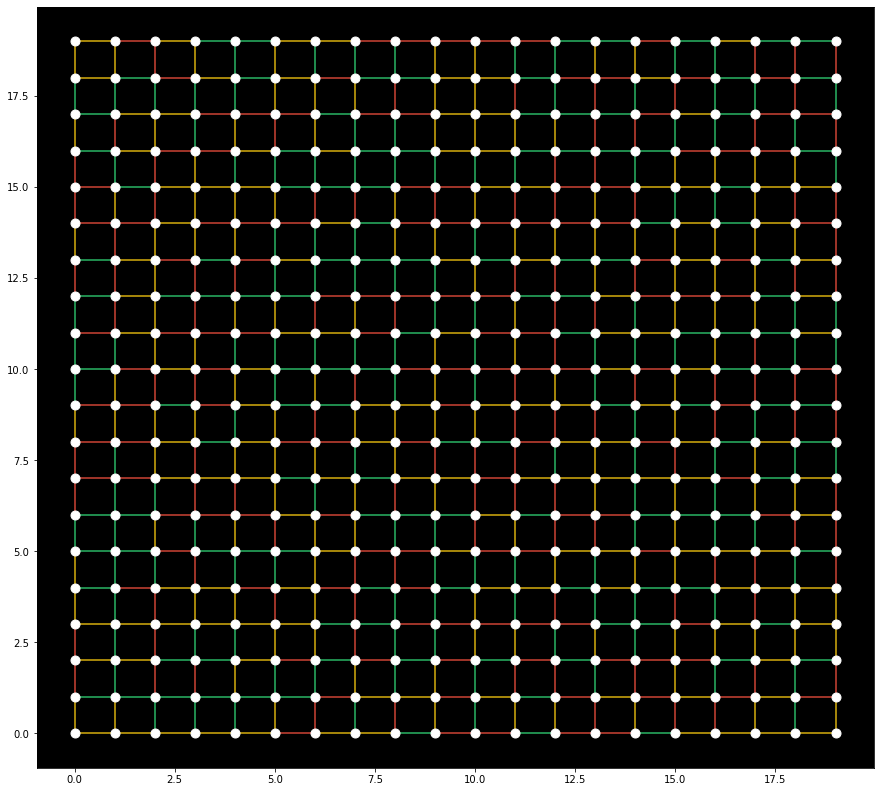

In [5]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (15, 14))
dibujarAristasPlanoCartesiano(grafo, listaNivelesTrafico, listaColoresNivelesTrafico, limiteInferiorCostosEntreAristasDelGrafo, limiteSuperiorCostosEntreAristasDelGrafo)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G']
[1.0, 0.25, 0.25, 0.5714285714285714, 0.25, 0.25, 0.0, 0.25]


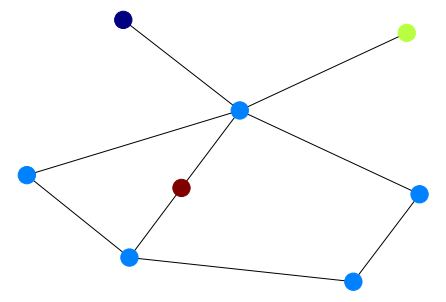

In [6]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]
print(G.nodes())
print(values)

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()


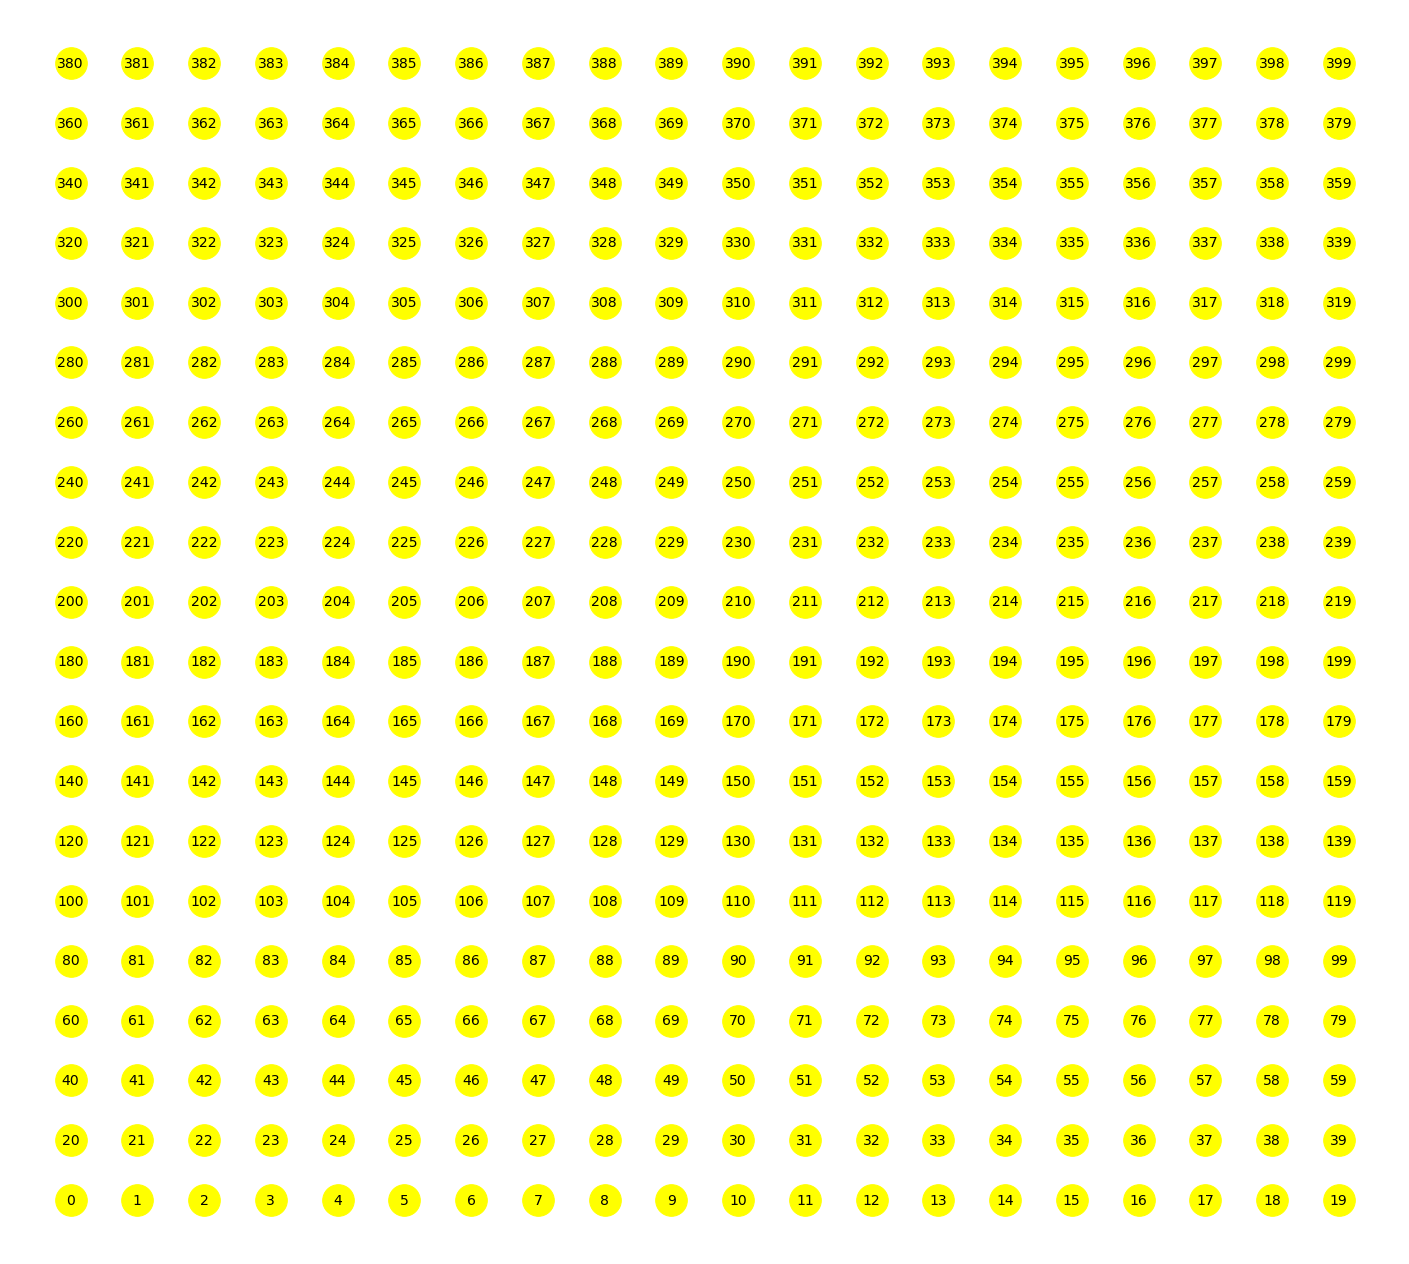

In [11]:
G = nx.Graph()

plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(1, figsize = (25, 23))

fixed_positions = {}

for nodoOrigen in grafo:
    for nodoDestino in grafo[nodoOrigen]:
        if nodoOrigen < nodoDestino:
            G.add_edge(str(nodoOrigen), str(nodoDestino), weight = grafo[nodoOrigen][nodoDestino])
            if str(nodoOrigen) not in fixed_positions:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                fixed_positions[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen)
            if str(nodoDestino) not in fixed_positions:
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                fixed_positions[str(nodoDestino)] = (valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino)

                
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, k = 1.0, pos = fixed_positions, fixed = fixed_nodes)
#nx.draw(G, pos)

nx.draw_networkx_nodes(G, pos, node_size = 1000, node_color = '#FFFF00')
nx.draw_networkx_labels(G, pos, font_size = 14, font_family = "sans-serif")

# nodes
#nx.draw(G, layout=nx.spring_layout(G, pos = posic, fixed = G.nodes()))

# edges
nx.draw_networkx_edges(G, posic, edgelist=elarge, width=6)
#nx.draw_networkx_edges(G, posic, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

# node labels

# edge weight labels
#edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, posic, edge_labels)

#ax = plt.gca()
plt.axis("off")
#plt.tight_layout()
plt.show()

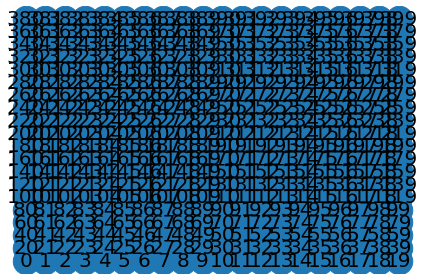

In [8]:
G = nx.Graph()
posic = {}

for nodoOrigen in grafo:
    for nodoDestino in grafo[nodoOrigen]:
        if nodoOrigen < nodoDestino:
            G.add_edge(str(nodoOrigen), str(nodoDestino), weight = grafo[nodoOrigen][nodoDestino])
            if str(nodoOrigen) not in posic:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAncho)
                posic[str(nodoOrigen)] = (valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen)
            if str(nodoDestino) not in posic:
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAncho)
                posic[str(nodoDestino)] = (valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

#pos = nx.spring_layout(G, k = 5, pos = posic, seed = 20)  # positions for all nodes - seed for reproducibility
posic2 = nx.spring_layout(G, k = 0.15, pos = posic, iterations=100)

# nodes
nx.draw_networkx_nodes(G, posic, node_size=700)

# edges
nx.draw_networkx_edges(G, posic, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, posic, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, posic, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, posic, edge_labels)

#plt.figure(figsize = (20, 18))
ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

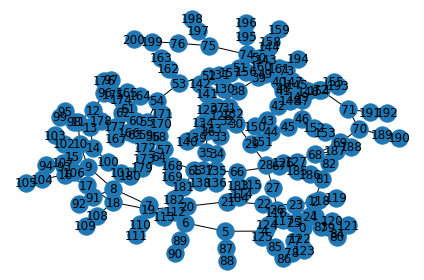

In [9]:
red = nx.random_lobster(60, 0.9, 0.9)
nx.draw_networkx(red)

ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()